In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

data_google_id = '1UEmM-9GI5smY3OB-scxIgLeZ7EmZlqkL'
gdd.download_file_from_google_drive(file_id=data_google_id, 
                                    dest_path = './new_manipulated_usp_data.csv', 
                                    showsize = True)

data_google_id2 = '1TmInpL1cXCxbbMJqiWnSuevsRy5ovbIn'
gdd.download_file_from_google_drive(file_id=data_google_id2, 
                                    dest_path = './BDIP_Mama_INTELI.xlsx', 
                                    showsize = True)

data_base = pd.read_csv("new_manipulated_usp_data.csv")
data_os = pd.read_excel("BDIP_Mama_INTELI.xlsx")

data_os = data_os.drop_duplicates('record_id', keep = 'first', ignore_index = True)
data_os = data_os['output_os']

data_base = data_base.assign(output_os = data_os)
data_base = data_base.dropna(axis = 0)

352.0 KiB Done.
2.4 MiB Done.


#Melhor Modelo

O modelo final foi escolhido a partir da sua acurácia e do número de falsos Low OS (falsos positivos), dentre todos os modelos já com os melhore hiperparâmetros.<br>
Tendo essa métrica como base o melhor modelo escolhido foi o Random Forest, tendo 66% de acurácia e 135 de falsos positivos.

##Random Forest

O modelo Random Forest cria várias árvores de decisão, uma estrutura similar a um fluxograma, com “nós” onde uma condição é verificada, e se atendida o fluxo segue por um ramo, caso contrário, por outro, sempre levando ao próximo nó, até a finalização da árvore. No fim há uma votação de um resultado final.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

     High OS       0.65      0.77      0.71       599
      Low OS       0.68      0.54      0.60       532

    accuracy                           0.66      1131
   macro avg       0.67      0.66      0.65      1131
weighted avg       0.66      0.66      0.66      1131



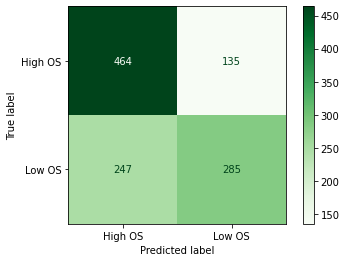

In [ ]:
from sklearn.ensemble import RandomForestClassifier

x = data_base.drop(columns=['record_id', 'output_os', 'follow_up_days',  'follow_up_days_recidive'])
y = data_base['output_os']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

model_random_forest = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.001,
                       min_samples_leaf=3,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=20,
                       verbose=0, warm_start=False)
model_random_forest.fit(x_train, y_train)
yPredMin = model_random_forest.predict(x_test)

matriz = plot_confusion_matrix(model_random_forest, x_test, y_test, cmap = 'Greens', values_format='.0f')
plt.grid(False)

print(classification_report(y_test, yPredMin))

## Input

Aqui, é possível adicionar novos valores para cada feature e predizer o risco para estes novos dados.

**pregnancy_history** -> Já ficou grávida?: Sim (2) / Não (1)<br>
**menarche** -> Grupo da primeira menstruação: Infância (3) / Pré-adolescência (2) / Adolescência (1) <br>
**diag_age** -> Idade no diagnóstico <br>
**period** -> Status da menopausa: Pré-menopausa (2) / Pós-menopausa (1) <br>
**bmi** -> IMC: Normal (0) / Abaixo do peso (1) / Acima do peso (2) / Obeso (3) / Extremamente obeso (4) <br>
**hormone_therapy** -> Fez terapia de reposição hormonal?: Sim (2) / Não (1)<br>
**antec_fam_cancer_mama** -> Tem antecedente familiar?: Sim (2) / Não (1)<br>
**tobaco** -> Faz uso de tabaco?: Sim (2) / Não (1)<br>
**alcohol** -> Faz uso de álcool?: Sim (2) / Não (1)<br>
**birads** -> BiRads: 0 (0) / 1 (1) / 2 (2) / 3 (3) / 4 (4) / 5 (5) / 6 (6)<br>
**ultinfo** -> Última informação: Viva com câncer (1) / Viva sem câncer (2) / Óbito por câncer (3) / Óbito por outras causas (4) <br>
**primary_diganosis** -> Diagnóstico primário: 0 / 2 / 3 / 4 / 5 / 6 / 7 / 8 / 9/ 10 / 11 / 12 / 13 / 14 / 15 / 16 / 18 / 19<br>
**histological_grade** -> Grau histológico: 0 / 1 / 2 / 3 <br>
**grau_hist** -> Grau histológico de Nottingham: 0 / 1 / 2 / 3 <br>
**tumor_subtype** -> Subtipo do tumor: 1 / 2 / 3 / 4 <br>
**tumor_stage** -> Estadio Clínico: 1A (11) / 1B (12) / 1C (13) / 1D (14) 2A (21) / 2B (22) / 2C (23) / 2D (24) / 3A (31) / 3B (32) / 3C (33) / 3D (34) / 4A (41) / 4B (42) / 4C (43) / 4D (44) <br>
**treatment** -> Regime de tratamento: Não fez quimioterapia (0) / Terapia adjuvante (1) / Terapia neoadjuvante (2) / Paliativo (3) / Terapia neoadjuvante sanduíche (Quimioterapia + Cirurgia + Quimioterapia) (4) <br>

In [ ]:
pregnancy_history = 2
menarche = 1
diag_age	= 40
period	= 2
bmi	= 0
hormone_therapy	= 1
antec_fam_cancer_mama	= 2
tobaco	= 1
alcohol	= 2
birads	= 6
ultinfo	= 1
primary_diganosis = 8
histological_grade = 2
grau_hist	= 3
tumor_subtype	= 4
tumor_stage	= 31
treatment	= 0

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


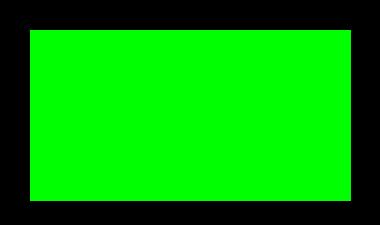


                  Risco Baixo                  


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

features = np.array([[pregnancy_history,	menarche,	diag_age,	period,	bmi,	hormone_therapy,	antec_fam_cancer_mama,	tobaco,	alcohol, birads,	ultinfo,	primary_diganosis,	histological_grade,	grau_hist,	tumor_subtype,	tumor_stage,	treatment]])
prediction = model_random_forest.predict(features)

if prediction == 'High OS':
  # Criando uma imagem preta para servir de fundo
  img = np.zeros((225, 380, 3), dtype = "uint8")
  
  # Criando um retângulo vermelho
  cv2.rectangle(img, (30, 30), (350, 200), (0, 0, 255), -1)
    
  cv2_imshow(img)
  print('')
  text = 'RISCO ALTO!'
  text = text.center(47, ' ')
  print(text)
else:
  # Criando uma imagem preta para servir de fundo
  img = np.zeros((225, 380, 3), dtype = "uint8")
  
  # Criando um retângulo verde
  cv2.rectangle(img, (30, 30), (350, 200), (0, 255, 0), -1)
    
  cv2_imshow(img)
  print('')
  text = 'Risco Baixo'
  text = text.center(47, ' ')
  print(text)